In [58]:
# imports
import os
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image



In [59]:

# variables

In [60]:
#https://stackoverflow.com/questions/48356398/opencv-remove-background-of-an-image/48356640#48356640

i = 0
def clean_image(img):
    image = img.copy()
    _,thresh = cv2.threshold(image,0,255,cv2.THRESH_BINARY)
    ctrs,hierarchy= cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    # sorted by width from small to large
    
    # exceptions
    try: hierarchy = hierarchy[0]
    except: hierarchy = []
    
    
    new_rects_ = []
    print(len(ctrs))
    if (len(ctrs))>1:
        
        ctrs = sorted(ctrs, key = lambda ctr:cv2.boundingRect(ctr)[2])
        for contour in range(len(ctrs)-1):
            (x,y,w,h) = cv2.boundingRect(ctrs[contour])

            new_rects_.append([x,y,w,h])
            cv2.rectangle(image, (x,y), (x+w,y+h), (255, 0, 0), 2) 

        for i in range(len(new_rects_)):
            x =  new_rects_[i][0]
            y =  new_rects_[i][1]
            w =  new_rects_[i][2]
            h =  new_rects_[i][3]
            start_point = (x-3, y-3)
            end_point = (x+w+5, y+h+3)
            color = (0, 0, 0)
            thickness = -1
            image = cv2.rectangle(image, start_point, end_point, color, thickness)       
            
            
    # change image shape
    h, w = image.shape
    if w>=h:
    #    outputImage = cv2.copyMakeBorder(img,100,100,50,50,cv2.BORDER_CONSTANT,value=[0, 0, 0])
        outputImage = cv2.copyMakeBorder(image,int(w/2)+10-int(h/2),int(w/2)+10-int(h/2),10,10,cv2.BORDER_CONSTANT,value=[0, 0, 0])
    if h>w:
        outputImage = cv2.copyMakeBorder(image,10,10,int(h/2)+10-int(w/2),int(h/2)+10-int(w/2),cv2.BORDER_CONSTANT,value=[0, 0, 0])

    return outputImage







#plt.imshow(clean_image(img), cmap="gray") 
#plt.show() 


In [61]:
def maintain_aspect_ratio_resize(image, width=None, height=None, inter=cv2.INTER_AREA):
    # Grab the image size and initialize dimensions
    dim = None
    (h, w) = image.shape
    
    # Return original image if no need to resize
    if width is None and height is None:
        return image

    # We are resizing height if width is none
    if width is None:
        # Calculate the ratio of the height and construct the dimensions
        r = height / float(h)
        dim = (int(w * r), height)
    # We are resizing width if height is none
    else:
        # Calculate the ratio of the width and construct the dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # Return the resized image
    return cv2.resize(image, dim, interpolation=inter)

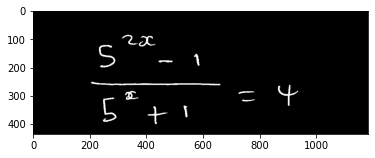

[205250, 233119, 247305, 31584, 325282, 37488, 405336, 443174, 532333, 569151, 726283, 738312, 865260]


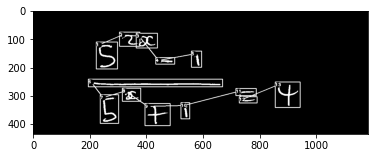

1


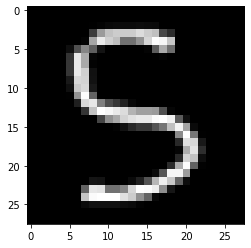

2


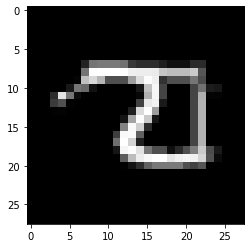

1


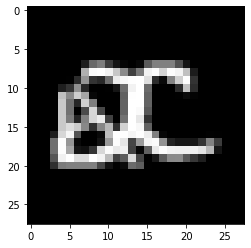

2


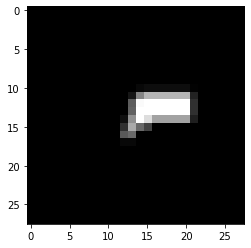

2


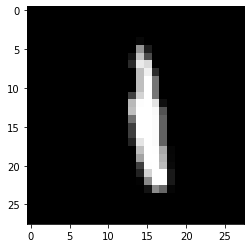

2


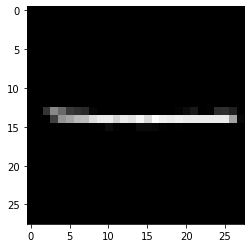

2


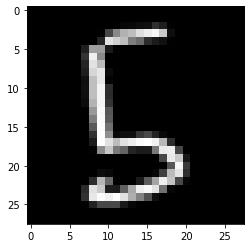

1


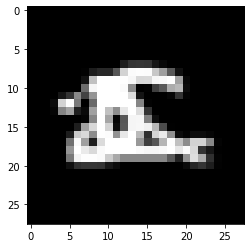

1


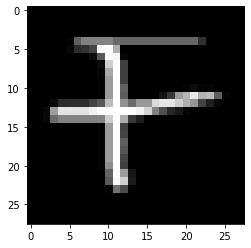

2


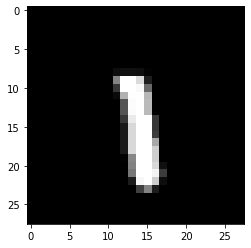

3


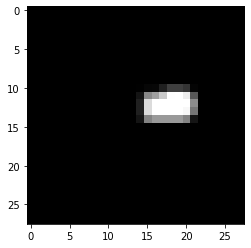

1


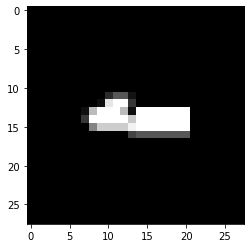

2


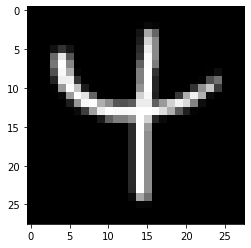

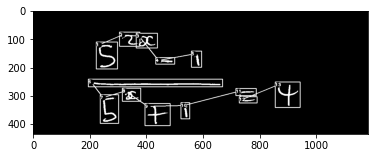

In [87]:
# https://www.kdnuggets.com/2021/03/extraction-objects-images-videos-5-lines-code.html

########################################################################################################################
def get_rows(img, centers, row_amt, row_h):
    centers = np.array(centers)
    d = row_h / row_amt
    for i in range(row_amt):
        f = centers[:, 1] - d * i
        a = centers[(f < d) & (f > 0)]
        yield a[a.argsort(0)[:, 0]]
        


        
        
        
        
        
        
        


############################################################################################################################


#####################
# function



id_ = []
rects_sorted = []
new_rects4 = []
center = []
arr_id = []

def row_funct(img,h):
    global train_data
    count = 0
    train_data = []
    h1, w = img.shape
    for row in get_rows(img, center, h, h1):
        cv2.polylines(img, [row], False, (255, 0, 255), 2)
        for x, y in row:
            thresh_id = int(str(x)+str(y))
            id_.append(thresh_id)
            count += 1
            cv2.circle(img, (x, y), 10, (0, 0, 255), -1)  
            cv2.putText(img, str(count), (x - 10, y + 5), 1, cv2.FONT_HERSHEY_PLAIN, (255, 255, 255), 2)

    plt.imshow(img, cmap="gray") 
    plt.show()


    ###########################################################################################################################

    # sorted rects 

    for f in id_:
        ind = arr_id.index(f)
        r = new_rects4[ind]
        rects_sorted.append(r)
        x = r[0]
        y = r[1]
        w = r[2]
        h = r[3]
        im_crop = thresh[y:y+h,x:x+w]
        if w>2*h:
            kernel = np.ones((2,2), np.uint8)
            im_crop = thresh[y:y+h,x:x+int(w/2.3)]
            #im_crop = cv2.dilate(im_crop, kernel, iterations=3)

        out = clean_image(im_crop)
        kernel = np.ones((2,2), np.uint8)
        resize_ratio = 0.1

        out = maintain_aspect_ratio_resize(out, width=int(40))
        #out = cv2.resize(out,(28,28))             
        out = cv2.resize(out,(28,28))

        train_data.append(out)
        plt.imshow(out, cmap="gray") 
        plt.show()
    ###########################################################################################################################

    plt.imshow(img, cmap="gray") 
    plt.show()
    
    count = 0
    return train_data
    
    
    
    
    
    
    
    
    
#predictions(train_data)
#######################################################################################################################
# Testdata8/eq3


def start_place(imag):
    global thresh, branch,len_eq
    img = ~ imag # invert image colours
    #_,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    se=cv2.getStructuringElement(cv2.MORPH_RECT , (8,8))
    bg=cv2.morphologyEx(imag, cv2.MORPH_DILATE, se)
    out_gray=cv2.divide(imag, bg, scale=255)
    out_binary=cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU )[1] 
    thresh = ~ out_binary
    out = thresh.copy
    plt.imshow(thresh, cmap="gray") 
    plt.show()  

    ctrs,hierarchy= cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    # sorting by y
    ctrs = sorted(ctrs, key = lambda ctr:cv2.boundingRect(ctr)[1])
    # sorting by x
    ctrs = sorted(ctrs, key = lambda ctr:cv2.boundingRect(ctr)[0])

    try: hierarchy = hierarchy[0]
    except: hierarchy = []
    # computes the bounding box for the contour, and draws it on the frame,


    for contour, hier in zip(ctrs, hierarchy):
        (x,y,w,h) = cv2.boundingRect(contour)
        if w > 6 and h > 6:
            midpoint = x+w/2
            area = (w)*(h)
            new_rects4.append([x,y,w,h,midpoint,area])
            # replace thresh with img
            cv2.rectangle(thresh, (x-10,y-10), (x+w+7,y+h+5), (255, 0, 0), 2)        
            points = (x,y)
            arr_id.append(int(str(x)+str(y)))
            center.append(points)

    print(arr_id )  


    train_data = row_funct(thresh,branch)
    len_eq = len(train_data)

    # replace thresh with img
    cv2.imshow('contours',thresh)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
branch = 2   
# Testdata1/eq7.jpg
imag = cv2.imread('C:/Users/nizen/conda-envs/Final year project/0to9regAndsigns/Testdata1/eq7.jpg',cv2.IMREAD_GRAYSCALE)
start_place(imag)


In [82]:

new_model = tf.keras.models.load_model('saved_model16/my_model16')

minus_arr = []
results_arr = []
sqrt_store = []
def predictions(train_data):
    for i in range(len_eq):
        train_data[i] = np.array(train_data[i])
        train_data[i] = train_data[i].reshape(1,28,28,1)
        output_pred = new_model.predict_classes(train_data[i])
        #print(str(i) + str(output_pred[0]))
        #results_arr.append(str(output_pred[0]))
 
 # appending the right things
        if output_pred[0] == 0:
            results_arr.append("0")
            
        if output_pred[0] == 1:
            # confusion between minus and 1

            
            #print('results = 1',i)
            if rects_sorted[i][2] > 2*rects_sorted[i][3]:                
                results_arr.append("-") 
                minus_arr.append(i)
            else:
                results_arr.append("1") 

        if output_pred[0] == 2:
            results_arr.append("2")

        if output_pred[0] == 3:
            results_arr.append("3")
            
        if output_pred[0] == 4:
            results_arr.append("4")
            
        if output_pred[0] == 5:
            results_arr.append("5")
                
        if output_pred[0] == 6:
            results_arr.append("6")
            
        if output_pred[0] == 7:
            results_arr.append("7")

        if output_pred[0] == 8:
            results_arr.append("8")

        if output_pred[0] == 9:
            results_arr.append("9")
            
        if output_pred[0] == 10:
            minus_arr.append(i)
            results_arr.append("-")
            
        if output_pred[0] == 11:
            results_arr.append("+")
            
        if output_pred[0] == 12:
            results_arr.append("x")
    
        if output_pred[0] == 13:
            results_arr.append("(")

        if output_pred[0] == 14:
            results_arr.append(")")

        if output_pred[0] == 15:
            results_arr.append("sqrt")
            sqrt_store.append(i)
    print(fraction_check(minus_arr))
    

out = []
eq_arr = []
def fraction_check(minus_arr):
    global branch
    dimen = []
    for minus in minus_arr:
        dimension_check = rects_sorted[minus]
        dimen.append(dimension_check)


    #img_ =  ~imag # invert image colours
    #_,thresh_ = cv2.threshold(img_,127,255,cv2.THRESH_BINARY)
    #plt.imshow(thresh_, cmap="gray") 
    #plt.show()  

    #print('dimen',dimen)
    
    for i in range(len(dimen)):
        r = dimen[i]
        x = r[0]
        y = r[1]
        w = r[2]
        h = r[3]
        #-int(w/4)
        im_crop_ = thresh[y-int(w/3.5):y+h+int(w/3.5),x:x+w]
        
        plt.imshow(im_crop_, cmap="gray") 
        plt.show() 

        # get image shape
        h,w = im_crop_.shape
        #print('midpoint at ',int(h/2))

        ctrs_,hierarchy_= cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

        try: hierarchy_ = hierarchy_[0]
        except: hierarchy_ = []


        num = False 
        den = False 
        for contour, hier in zip(ctrs_, hierarchy_):
            (x,y,w,h1) = cv2.boundingRect(contour)
            cv2.rectangle(thresh, (x,y), (x+w,y+h1), (255, 0, 0), 2) 

            if w > 6 and h > 6:
                if y>int(h/2)+10:
                    num = True
                if y<int(h/2)-10:
                    den = True

        if den == True and num == True:
            out.append([minus_arr[i],'fraction'])
            results_arr[minus_arr[i]] = 'fraction'
            if minus_arr[i]<3:
                print('branch activated')
                branch = 2
            #branch = 2
            #out ='fraction'
        if den == True and num == False:
            eq_arr.append([minus_arr[i],'='])
        if den == False and num == True:
            eq_arr.append([minus_arr[i],'='])
            

    return out
#plt.imshow(thresh_, cmap="gray") 
#plt.show()  


# after frcavtion bar identified the next minus (normal, equals, gt, lt)






################################################################################################################################
Area = []
def Area_fun(): 
  
    # area must not be a squareroot
    for i in range(len(new_rects4)):
        Area.append(rects_sorted[i][5])

    #print(Area)


    # remove squareroots
    for i in sqrt_store:
        Area[i] = 0

    #print(Area)
    large_area = max(Area) #out[-1]
    #print(large_area)
    #print(min(Area))
    
    print('len Area',len(Area))
    for i in range(0,len(Area),1):
        #print(' results_arr[i] is', results_arr[i])
        cond = False
        #print(results_arr[i])

        #if (i+1)<len(Area):
        if (results_arr[i])=='1':
            cond = True
        if (results_arr[i])=='-':
            cond = True
        if (results_arr[i])=='sqrt':
            cond = True
        if (results_arr[i])=='+':
            cond = True
            # if (temporary[i] != "-") or (temporary[i] != "1"):
        #print('large area in loop',large_area,'Area i',Area[i],'  Area i*3.2  ',2.8*Area[i])
        if cond != True:
            # Area from 3.2 - 3 - 
            if 2.8*Area[i]<large_area: 
                #print('here')
                    #print('yes',results_arr[i])
                #print(results_arr[i])
                results_arr[i] = '^'+ results_arr[i]

            
            
            
            
            
            
            
################################################################################################################################
# equal algorithm
def equal_mani():
    for i in range(len(eq_arr)):
        if i+1 < len(eq_arr):
            if (eq_arr[i][0]+1) == (eq_arr[i+1][0]):
                # replacing      
                results_arr[eq_arr[i][0]] = '='
                results_arr.pop(eq_arr[i][0]+1) 

 

def scan_run():
    predictions(train_data) # runs prediction and fraction check
    Area_fun()
    equal_mani()
    print(results_arr)
    #print(out)
    #print(eq_arr)



    #print(results_arr) 
    #print(' sqrt_store', sqrt_store)
    # remove squareroot from area
    
scan_run()

IndexError: list index out of range

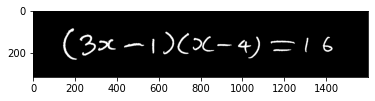

[14386, 223115, 311136, 435156, 568136, 622102, 690108, 763132, 808124, 880160, 979141, 1028125, 1135144, 1147185, 1299131, 1384126, 14386, 223115, 311136, 435156, 568136, 622102, 690108, 763132, 808124, 880160, 979141, 1028125, 1135144, 1147185, 1299131, 1384126]


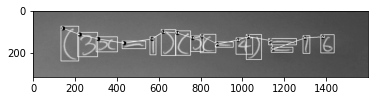

2


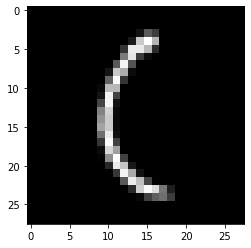

1


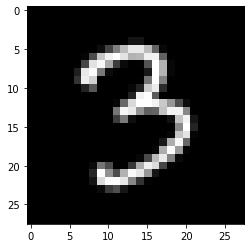

4


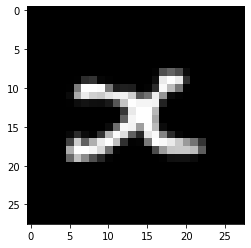

1


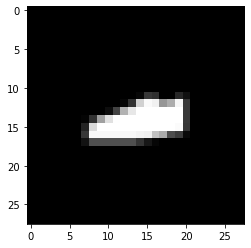

1


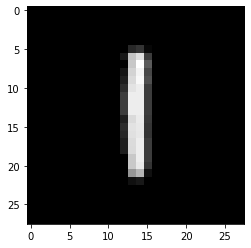

1


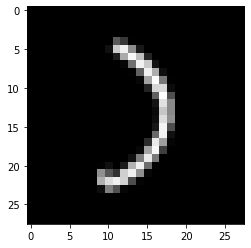

1


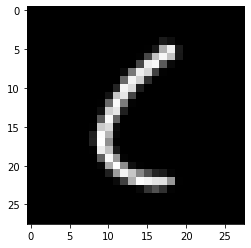

1


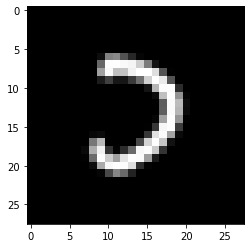

1


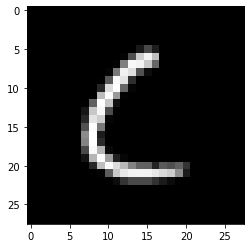

1


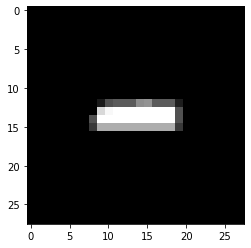

1


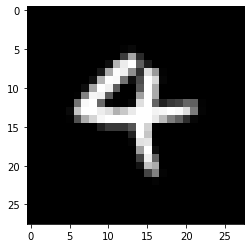

2


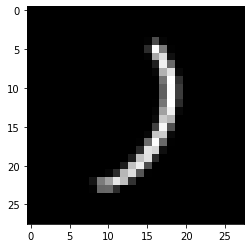

1


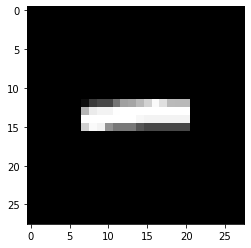

1


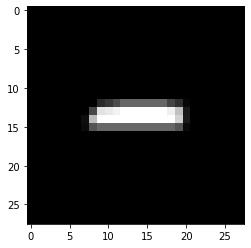

1


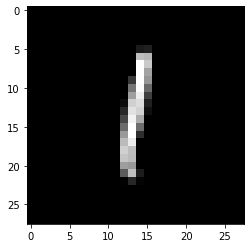

1


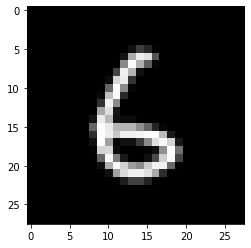

2


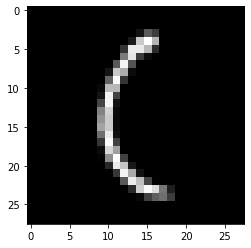

2


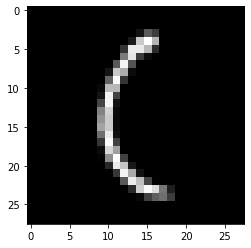

1


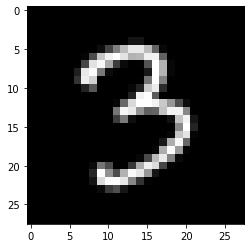

1


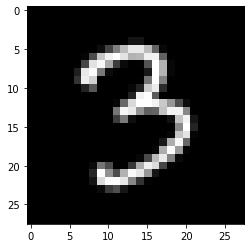

4


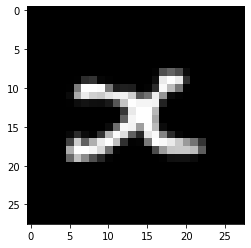

4


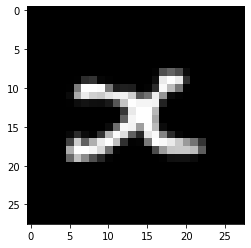

1


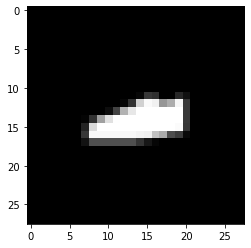

1


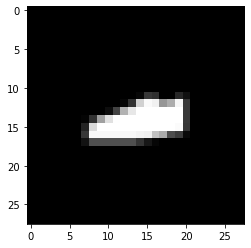

1


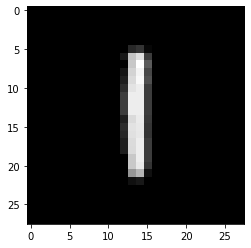

1


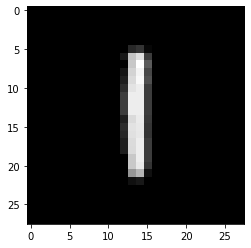

1


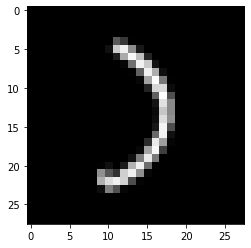

1


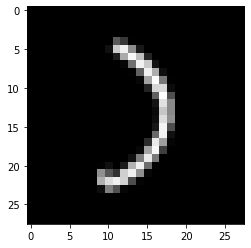

1


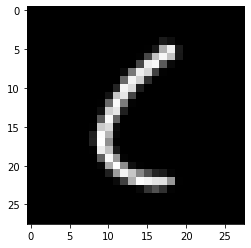

1


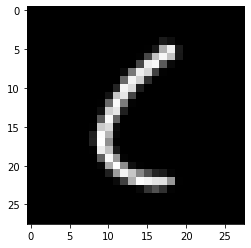

1


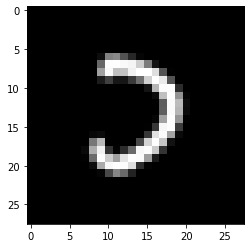

1


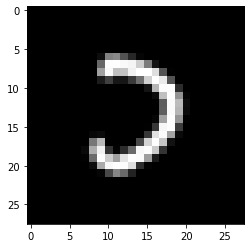

1


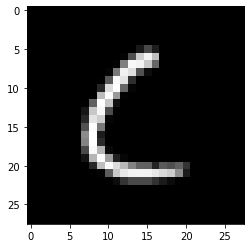

1


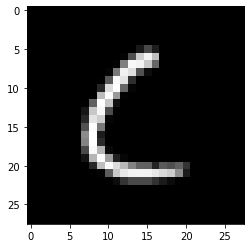

1


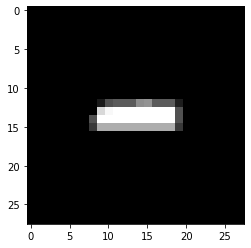

1


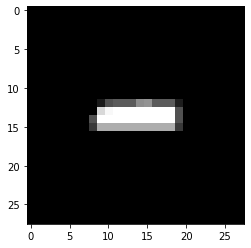

1


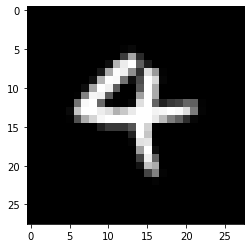

1


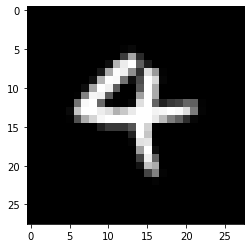

2


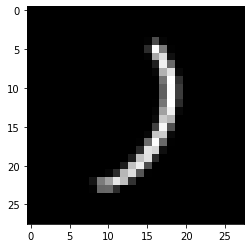

2


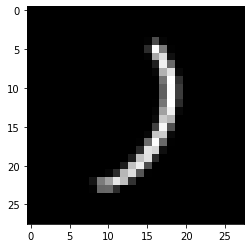

1


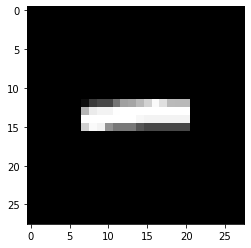

1


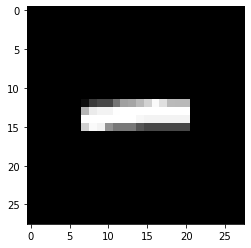

1


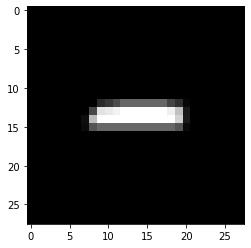

1


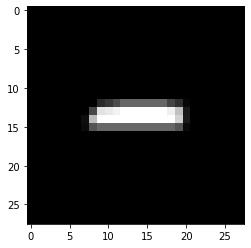

1


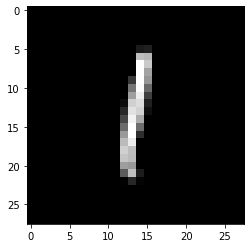

1


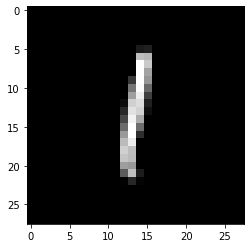

1


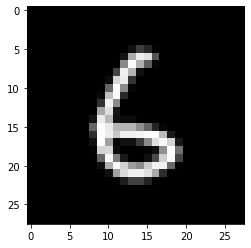

1


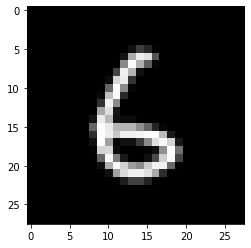

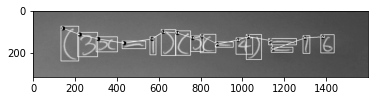

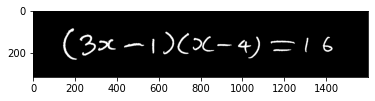

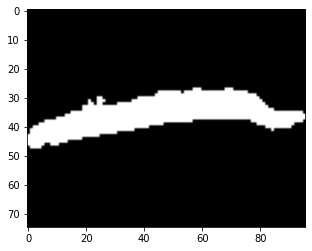

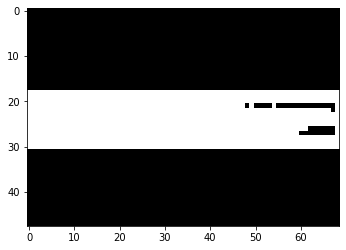

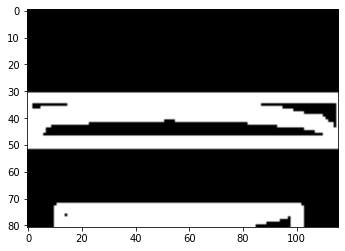

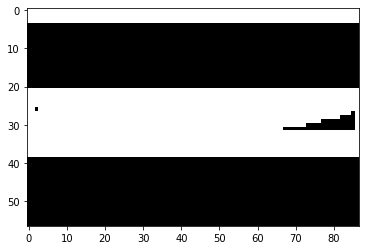

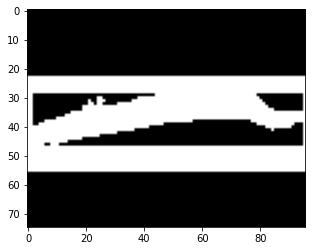

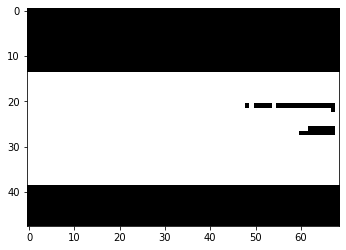

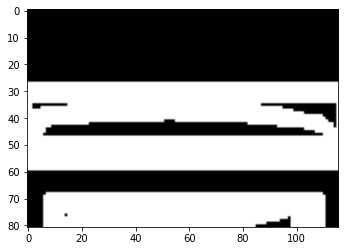

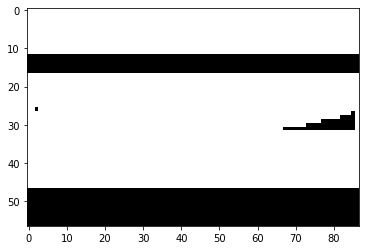

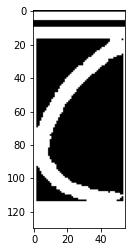

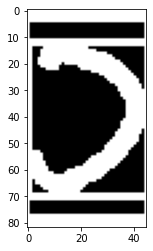

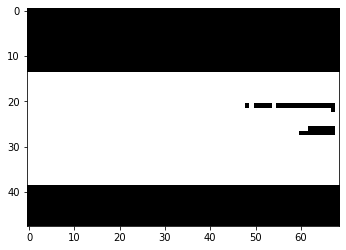

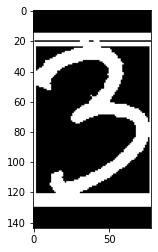

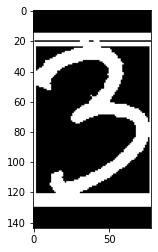

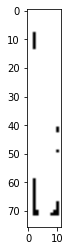

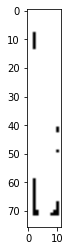

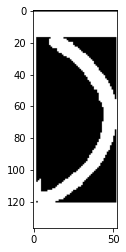

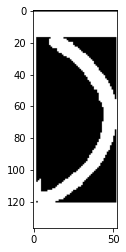

[]
len Area 48
['(', '3', 'x', '-', '1', ')', '(', '^^0', '(', '-', '4', ')', '=', '3', 'x', '-', '1', '^)', '(', '0', '^(', '-', '=', '-', '-', '1', '^6', '^(', '(', '3', '3', '^x', '^x', '-', '=', '1', '^)', ')', '(', '^(', '=', '=', '=', '4', '4', ')', ')', '-', '-', '-', '-', '1', '1', '6', '6']


In [31]:

del 
start_place(imag)
scan_run()
# reset branch
#branch = 1

# final 
#branching = 1

#train_data = row_funct(img,1)
#len_eq = len(train_data)

In [325]:
# running code

['[2]', '[/]', '[11]', '[/]', '[3]', '[4]', '[6]']


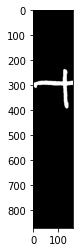

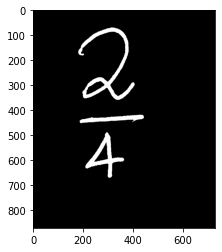

In [118]:
# replace with fraction

for i in out:
    ind = i[0]
    results_arr[ind] = '[/]'
    #print(ind)
    
print(results_arr)  

# crop from 11

# extra sign
for i in range(len(results_arr)):
    startx = 0
    starty = 0
    endx = 0
    endy = 0
    if results_arr[i] == '[11]':
        h,_ = img.shape
        startx = rects_sorted[i][0]
        starty = 0
        endx   = rects_sorted[i][0] + rects_sorted[i][3]
        endy   = h
        sign_img = thresh[starty:endy,startx:endx]
    
        plt.imshow(sign_img, cmap="gray") 
        plt.show() 
        # cropping
        
        
        # crop before x
        term_img = thresh[0:endy,0:startx]
        plt.imshow(term_img, cmap="gray") 
        plt.show() 
        

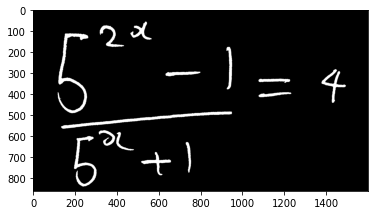

TypeError: can only concatenate list (not "int") to list

In [152]:
# https://www.kdnuggets.com/2021/03/extraction-objects-images-videos-5-lines-code.html

import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image



imag = cv2.imread('C:/Users/nizen/conda-envs/Final year project/0to9regAndsigns/eq5.jpg',cv2.IMREAD_GRAYSCALE)


train_data = []
new_rects1 = []

img = ~ imag # invert image colours
_,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
plt.imshow(thresh, cmap="gray") 
plt.show()  

ctrs,hierarchy= cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
# sorting by y
ctrs = sorted(ctrs, key = lambda ctr:cv2.boundingRect(ctr)[1])
# sorting by x
ctrs = sorted(ctrs, key = lambda ctr:cv2.boundingRect(ctr)[0])

try: hierarchy = hierarchy[0]
except: hierarchy = []
# computes the bounding box for the contour, and draws it on the frame,
for contour, hier in zip(ctrs, hierarchy):
    (x,y,w,h) = cv2.boundingRect(contour)
    if w > 6 and h > 6:
        midpoint = [x+w/2,y+h/2]
        new_rects1.append([x,y,w,h,midpoint])
        cv2.rectangle(img, (x-10,y-10), (x+w+7,y+h+5), (255, 0, 0), 2) 
        #cv2.circle(img, (int(x+w/2),int(y+h/2)), radius=10, color=(0, 0, 255), thickness=-1)

        font = cv2.FONT_HERSHEY_SIMPLEX
        org = (int(x+w/2),int(y+h/2))
        fontScale = 1
        color = (255, 0, 0)
        thickness = 2
        cv2.putText(img, str(i), org, font, fontScale, color, thickness, cv2.LINE_AA)
        i = i + 1


rect_and_train = []
for r in new_rects1:
    x = r[0]
    y = r[1]
    w = r[2]
    h = r[3]
    im_crop = thresh[y:y+h,x:x+w]
    if w>1.8*h:
        kernel = np.ones((2,2), np.uint8)
        im_crop = thresh[y:y+h,x:x+int(w/2.3)]
        #im_crop = cv2.dilate(im_crop, kernel, iterations=3)

    out = clean_image(im_crop)

    kernel = np.ones((2,2), np.uint8)
    #out = cv2.GaussianBlur(out, (3, 3), 50)
    #out = cv2.erode(out, kernel, iterations=1)
    resize_ratio = 0.1

    out = maintain_aspect_ratio_resize(out, width=int(400 * resize_ratio))
    out = cv2.resize(out,(28,28))             
    out = cv2.resize(out,(28,28))

    train_data.append(out)
    plt.imshow(out, cmap="gray") 
    plt.show()


plt.imshow(img, cmap="gray") 
plt.show()

predictions(train_data)

        

cv2.imshow('contours',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# replace

In [ ]:
import numpy as np
new_model = tf.keras.models.load_model('saved_model12/my_model12')

s = ''
# store reults and dimenstion
resultanmidpoint = []
for i in range(len(train_data)):
    train_data[i] = np.array(train_data[i])
    train_data[i] = train_data[i].reshape(1,28,28,1)
    results = new_model.predict_classes(train_data[i])
    minusfraccontainer = []
    
    
    if (results[0]==10):
        s = s + '-'
        resultanmidpoint.append(['-',new_rects[i][4]])        
    if (results[0]==11):
        s = s + '+'
        resultanmidpoint.append(['+',new_rects[i][4]])  
    if (results[0]==12):
        s = s + '*'
    if (results[0]==1):
        s = s + '1'
        # if width > height
        #if new_rects[i][2] > 2*new_rects[i][3]:
        #    s = s + '-'
        #    resultanmidpoint.append(['-',new_rects[i][4]])  
            
            # check if fraction/minus code
            
        #else:
        #    s = s + '1'
        #    resultanmidpoint.append(['1',new_rects[i][4]])  
            
    if (results[0]==2):
        s = s + '2'
        resultanmidpoint.append(['2',new_rects[i][4]])  
    if (results[0]==3):
        s = s + '3'
        resultanmidpoint.append(['3',new_rects[i][4]])  
    if (results[0]==4):
        s = s + '4'
        resultanmidpoint.append(['4',new_rects[i][4]])  
    if (results[0]==5):
        s = s + '5'
        resultanmidpoint.append(['5',new_rects[i][4]])  
    if (results[0]==6):
        s = s + '6'
        resultanmidpoint.append(['6',new_rects[i][4]])  
    if (results[0]==7):
        s = s + '7'
        
        resultanmidpoint.append(['7',new_rects[i][4]])  
    if (results[0]==8):
        s = s + '8'
        resultanmidpoint.append(['8',new_rects[i][4]])  
    if (results[0]==9):
        s = s + '9'
        resultanmidpoint.append(['9',new_rects[i][4]])  


# store predicted character and coordinates   
print(s)
print(resultanmidpoint)

In [36]:
# find start item

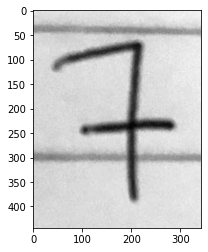

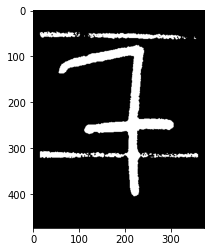

In [205]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#C:/Users/nizen/conda-envs/Final year project/0to9regAndsigns/3input.jpg
#7feint
img = cv2.imread('C:/Users/nizen/conda-envs/Final year project/0to9regAndsigns/7feint.jpg',cv2.IMREAD_GRAYSCALE)
imag = img
plt.imshow(imag, cmap="gray") 
plt.show()
img = ~ img
_,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

img = cv2.copyMakeBorder(img,15,15,15,15,cv2.BORDER_CONSTANT,value=[0, 0, 0])
kernel = np.ones((2,2), np.uint8)
#img = cv2.dilate(img, kernel, iterations=)
#img = cv2.resize(img,(28,28))
plt.imshow(img, cmap="gray") 
plt.show()




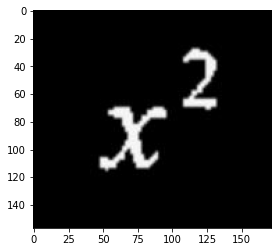

44
64
56
56
95
65
9
15
104
24
32
52


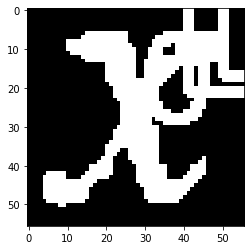

UnboundLocalError: local variable 'outputImage' referenced before assignment

In [56]:
# https://www.kdnuggets.com/2021/03/extraction-objects-images-videos-5-lines-code.html

import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image



#img = cv2.imread('C:/Users/nizen/conda-envs/Final year project/0to9regAndsigns/1over2plus3over5minus8over9plus2.png',cv2.IMREAD_GRAYSCALE)
imag = cv2.imread('C:/Users/nizen/conda-envs/Final year project/0to9regAndsigns/exp2.jpg',cv2.IMREAD_GRAYSCALE)
# 21x7_book2



train_data = []
new_rects1 = []
img = 0
def start_code(img):
    if img is not None:
        img = ~ imag # invert image colours
        #_,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        
        thresh = img
        #_,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        plt.imshow(thresh, cmap="gray") 
        plt.show()  
        ctrs,hierarchy= cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    
        # sorting by y
        ctrs = sorted(ctrs, key = lambda ctr:cv2.boundingRect(ctr)[1])
         # sorting by x
        ctrs = sorted(ctrs, key = lambda ctr:cv2.boundingRect(ctr)[0])

        try: hierarchy = hierarchy[0]
        except: hierarchy = []
        # computes the bounding box for the contour, and draws it on the frame,
        i = 0
        for contour, hier in zip(ctrs, hierarchy):
            (x,y,w,h) = cv2.boundingRect(contour)

            if w > 6 and h > 6:
                    print(x)
                    print(y)
                    print(w)
                    print(h)
                    midpoint = [x+w/2,y+h/2]
                    new_rects1.append([x,y,w,h,midpoint])
                    cv2.rectangle(thresh, (x-10,y-10), (x+w+7,y+h+5), (255, 0, 0), 2) 
                    #cv2.circle(img, (int(x+w/2),int(y+h/2)), radius=10, color=(0, 0, 255), thickness=-1)

                    font = cv2.FONT_HERSHEY_SIMPLEX
                    org = (int(x+w/2),int(y+h/2))
                    fontScale = 1
                    color = (255, 0, 0)
                    thickness = 2
                    cv2.putText(img, str(i), org, font, fontScale, color, thickness, cv2.LINE_AA)
                    i = i + 1
        
        cv2.imshow('contours',thresh)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        rect_and_train = []
        for r in new_rects1:
            x = r[0]
            y = r[1]
            w = r[2]
            h = r[3]
            im_crop = thresh[y:y+h,x:x+w]
            if w>1.8*h:
                kernel = np.ones((2,2), np.uint8)
                im_crop = thresh[y:y+h,x:x+int(w/2.3)]
                #im_crop = cv2.dilate(im_crop, kernel, iterations=3)

            out = clean_image(im_crop)
            
            kernel = np.ones((2,2), np.uint8)
            #out = cv2.GaussianBlur(out, (3, 3), 50)
            #out = cv2.erode(out, kernel, iterations=1)
            resize_ratio = 0.1
            
            out = maintain_aspect_ratio_resize(out, width=int(400 * resize_ratio))
            out = cv2.resize(out,(28,28))             
            out = cv2.resize(out,(28,28))

            train_data.append(out)
            plt.imshow(out, cmap="gray") 
            plt.show()


        plt.imshow(img, cmap="gray") 
        plt.show()
        


        
start_code(imag)


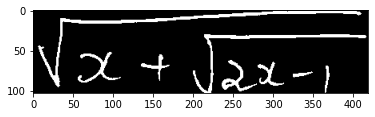

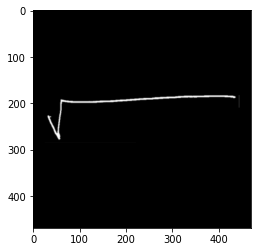

In [27]:

#https://stackoverflow.com/questions/48356398/opencv-remove-background-of-an-image/48356640#48356640
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("C:/Users/nizen/conda-envs/Final year project/0to9regAndsigns/ss1.png", cv2.IMREAD_GRAYSCALE)

# extend arplt.imshow(clean_image(img), cmap="gray") 

def clean_image(img):
    _,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    plt.imshow(thresh, cmap="gray") 
    plt.show() 
    ctrs,hierarchy= cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    # sorted by width from small to large
    ctrs = sorted(ctrs, key = lambda ctr:cv2.boundingRect(ctr)[2])
    # exceptions
    try: hierarchy = hierarchy[0]
    except: hierarchy = []

    new_rects = []
    for contour in range(len(ctrs)-1):
        (x,y,w,h) = cv2.boundingRect(ctrs[contour])

        new_rects.append([x,y,w,h])
        cv2.rectangle(img, (x,y), (x+w,y+h), (255, 0, 0), 2) 

    for i in range(len(new_rects)):
        x = new_rects[i][0]
        y = new_rects[i][1]
        w = new_rects[i][2]
        h = new_rects[i][3]
        start_point = (x-3, y-3)
        end_point = (x+w+5, y+h+3)
        color = (0, 0, 0)
        thickness = -1
        img = cv2.rectangle(img, start_point, end_point, color, thickness)

    # change image shape
    h, w = img.shape

    if w>h:
    #    outputImage = cv2.copyMakeBorder(img,100,100,50,50,cv2.BORDER_CONSTANT,value=[0, 0, 0])
        outputImage = cv2.copyMakeBorder(img,int(w/2)+25-int(h/2),int(w/2)+25-int(h/2),25,25,cv2.BORDER_CONSTANT,value=[0, 0, 0])

    if h>w:
        outputImage = cv2.copyMakeBorder(img,25,25,int(h/2)+25-int(w/2),int(h/2)+25-int(w/2),cv2.BORDER_CONSTANT,value=[0, 0, 0])

    return outputImage



plt.imshow(clean_image(img), cmap="gray") 
plt.show()  


In [44]:
# https://stackoverflow.com/questions/66946804/python-sorting-items-from-top-left-to-bottom-right-with-opencv
import cv2
import numpy as np
def get_rows(img, centers, row_amt, row_h):
    centers = np.array(centers)
    d = row_h / row_amt
    for i in range(row_amt):
        f = centers[:, 1] - d * i
        a = centers[(f < d) & (f > 0)]
        yield a[a.argsort(0)[:, 0]]

#img = cv2.imread("shapes.png")
#Testdata1/eq2
# lighting errr analysis
imag = cv2.imread('C:/Users/nizen/conda-envs/Final year project/0to9regAndsigns/Testdata4/eq7.jpg',cv2.IMREAD_GRAYSCALE)

img = ~ imag

_,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ctrs,hierarchy= cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
imag = cv2.cvtColor(imag,cv2.COLOR_GRAY2BGR)
try: hierarchy = hierarchy[0]
except: hierarchy = []

# computes the bounding box for the contour, and draws it on the frame,

i = 0
center = []
new_rects2 = []

for contour, hier in zip(ctrs, hierarchy):
    (x,y,w,h) = cv2.boundingRect(contour)
    if w > 6 and h > 6:         
            #points = (int(x+w/2),int(y+h/2))
            cv2.rectangle(imag, (x-10,y-10), (x+w+7,y+h+5), (0, 255, 0), 2) 
            midpoint = [x+w/2,y+h/2]
            new_rects2.append([x,y,w,h,midpoint])
            
            points = (x,y)
            center.append(points)
            i = i + 1
    


h, w = img.shape
count = 0


# first try 2 then try 1
#cv2.cvtColor(imag,cv2.COLOR_GRAY2RGB)
cv2.circle(imag, (30, 30), 10, (0, 0, 255), -1)
for row in get_rows(imag, center, 1, h):
    #cv2.polylines(imag, [row], False, (255, 0, 0), 2)
    for x, y in row:
        count += 1
        #cv2.rectangle(img,boxes,(255,0,0),2)
        #cv2.circle(imag, (x, y), 10, (255,0, 0), -1)  
        #cv2.putText(imag, str(count), (x - 10, y + 5), 1, cv2.FONT_HERSHEY_PLAIN, (255, 255, 255), 2)
        # crop and thresh here


cv2.imshow("Line propagation",imag)
cv2.waitKey(0)


#train_data = []
#for r in new_rects:
#    x = r[0]
#    y = r[1]
#    w = r[2]
#    h = r[3]
#    im_crop = thresh[y:y+h+7,x:x+w+7]
#    im_resize = cv2.resize(im_crop,(28,28))
#    train_data.append(im_resize)




-1

In [97]:
p = str(5)+str(3)
print(p)

print(int('53'))

53
53


In [37]:
# https://stackoverflow.com/questions/66946804/python-sorting-items-from-top-left-to-bottom-right-with-opencv
import cv2
import numpy as np
def get_rows(img, centers, row_amt, row_h):
    centers = np.array(centers)
    d = row_h / row_amt
    for i in range(row_amt):
        f = centers[:, 1] - d * i
        a = centers[(f < d) & (f > 0)]
        yield a[a.argsort(0)[:, 0]]


center = []
new_rects2 = []
for contour, hier in zip(ctrs, hierarchy):
    (x,y,w,h) = cv2.boundingRect(contour)
    if w > 6 and h > 6:
            midpoint = [x+w/2,y+h/2]
            new_rects2.append([x,y,w,h,midpoint])
            points = (x,y)
            center.append(points)
            #i = i + 1
    


h, w = img.shape
count = 0
# first try 2 then try 1
for row in get_rows(img, center, 1, h):
    cv2.polylines(img, [row], False, (255, 0, 255), 2)
    for x, y in row:
        count += 1
        cv2.circle(img, (x, y), 10, (0, 0, 255), -1)  
        cv2.putText(img, str(count), (x - 10, y + 5), 1, cv2.FONT_HERSHEY_PLAIN, (255, 255, 255), 2)
        
        # thresh here
        # crop and thresh here

cv2.imshow("Line propagation", img)
cv2.waitKey(0)


train_data = []
for r in new_rects:
    x = r[0]
    y = r[1]
    w = r[2]
    h = r[3]
    im_crop = thresh[y:y+h+7,x:x+w+7]
    im_resize = cv2.resize(im_crop,(28,28))
    train_data.append(im_resize)




NameError: name 'new_rects' is not defined

In [79]:
# equal check 

# use def redictions
# connection
#equal_check = row_funct(img,1)

#predict_2 = []
#for i in range(len_eq):
#    equal_check[i] = np.array(equal_check[i])
#    equal_check[i] = equal_check[i].reshape(1,28,28,1)
#    output_equal_check = new_model.predict_classes(equal_check[i])
#    predict_2.append(output_equal_check[0])
    


# check exponent
# fraction midpoint code


#for i in range(len(predict_2)):
#    if i > 0:
#        store1 = predict_2[i-1]
#        store2 = predict_2[i]
    
#    if store1 == store2 == 10:
#        store_i = i
#        results_arr[i-1] = '='
#        results_arr.pop(i) 
        
        # remove minus sign and replace with equals   

# print(results_arr)

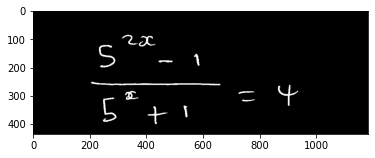

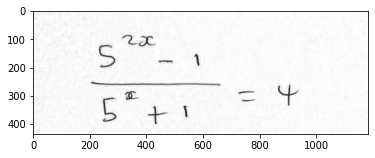

In [47]:
# it is necessary to correct the nonuniform illumination of the background. For example, like this:
# https://stackoverflow.com/questions/62042172/how-to-remove-noise-in-image-opencv-python
import cv2
import numpy as np
import matplotlib.pyplot as plt



image = cv2.imread('C:/Users/nizen/conda-envs/Final year project/0to9regAndsigns/Testdata1/eq7.jpg',cv2.IMREAD_GRAYSCALE)

imag = image # invert image colours
se=cv2.getStructuringElement(cv2.MORPH_RECT , (8,8))
bg=cv2.morphologyEx(imag, cv2.MORPH_DILATE, se)
out_gray=cv2.divide(imag, bg, scale=255)
out_binary=cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU )[1] 
thresh = ~ out_binary
    

plt.imshow(thresh,cmap="gray")  
plt.show() 

plt.imshow(out_gray,cmap="gray") 
plt.show() 

#plt.imshow(clean_image(img), cmap="gray") 
 